# Task 1 - Machine Learning




# Introdução:

Escolha do conjunto de dados: "Students Performance in Exams" do Kaggle

A educação é uma área vital para o desenvolvimento e o progresso da sociedade. Compreender os fatores que afetam o desempenho dos alunos em exames é fundamental para garantir que todos os alunos recebam uma educação de qualidade e tenham igualdade de oportunidades de sucesso acadêmico. Neste contexto, o conjunto de dados "Students Performance in Exams" do Kaggle fornece uma oportunidade para explorar e analisar o desempenho dos alunos por meio de técnicas avançadas de Machine Learning.

Este conjunto de dados contém informações abrangentes sobre os alunos, incluindo detalhes demográficos, como gênero, raça/etnia e nível de educação dos pais, bem como pontuações em exames de matemática, leitura e escrita. Ao aplicar métodos de machine learning a esses dados, poderei identificar padrões complexos e relacionamentos entre as variáveis que podem nos ajudar a entender melhor os determinantes do sucesso acadêmico dos alunos.

Neste projeto, explorarei técnicas de machine learning para prever o desempenho dos alunos com base em suas características demográficas e outros fatores relevantes. Ao final, espero obter insights que possam informar políticas e práticas educacionais, bem como orientar intervenções destinadas a melhorar o desempenho e o bem-estar dos alunos.

# Importing Libraries

New libraries can be inserted throughout the project if necessary.

In [360]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm, ttest_ind, chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# pip install seaborn


# Load the Dataset

In [361]:
dataframe = pd.read_csv('StudentsPerformance.csv')
pd_student=pd.read_csv('StudentsPerformance.csv')

# Análise Descritiva dos Dados:

In [362]:
pd_student.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [363]:
pd_student.shape

(1000, 8)

In [364]:
pd_student.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Criando novas variaveis:

No processo de análise do conjunto de dados "Students Performance in Exams", optei por criar novas  variáveis como por exemplo a variavel de "Pontuação Total" e "Média das Pontuações". Essas novas variáveis foram adicionadas com o objetivo de fornecer medidas mais abrangentes e informativas do desempenho acadêmico dos alunos.

A variável, "Pontuação Total", foi criada somando as pontuações individuais dos alunos em todas as disciplinas, incluindo Matemática, Leitura e Escrita. A adição dessa variável permite uma avaliação holística do desempenho acadêmico geral de cada aluno, capturando sua capacidade em várias áreas do currículo escolar.

A variável, "Média das Pontuações", foi calculada pela obtenção da média aritmética das pontuações em todas as disciplinas para cada aluno. Essa média oferece uma medida mais suave e equilibrada do desempenho acadêmico, levando em consideração não apenas o desempenho em uma única disciplina, mas sim em todas as áreas avaliadas.

Essas novas variáveis são essenciais para uma análise mais aprofundada e uma compreensão mais completa do desempenho dos alunos nos exames. Ao adicionar essas medidas agregadas, podemos identificar padrões, tendências e discrepâncias no desempenho dos alunos de forma mais eficaz.

Em resumo, a criação das variáveis de "Pontuação Total" e "Média das Pontuações" enriquece o conjunto de dados, oferecendo uma perspectiva mais abrangente do desempenho acadêmico dos alunos e facilitando análises mais detalhadas e significativas sobre o tema.







#Calculando a Pontuação Total: Somando as pontuações em todas as disciplinas para cada aluno e armazenando o resultado em uma nova coluna. Utilizando o método .sum(axis=1) para somar as pontuações ao longo das colunas.

In [365]:
pd_student['Total Score'] = pd_student[['math score', 'reading score', 'writing score']].sum(axis=1)

#Calculando a Média das Pontuações: calculando a média das pontuações em todas as disciplinas para cada aluno e armazenando o resultado em uma nova coluna. Utilizando o método .mean(axis=1) para calcular a média ao longo das colunas.

In [366]:
pd_student['Average Score'] = pd_student[['math score', 'reading score', 'writing score']].mean(axis=1)

#Check information about variables and data types

In [367]:
print(pd_student.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   Total Score                  1000 non-null   int64  
 9   Average Score                1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB
None


# Calculate descriptive statistics

In [368]:
pd_student.describe()

,math score,reading score,writing score,Total Score,Average Score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000



Count (count): Indicates the total number of observations in the variable. In the specific case, there are 1000 observations of math scores.

Mean (mean): Represents the arithmetic mean of the math scores. In this case, the mean is approximately 66.089.

Std (standard deviation): Refers to the standard deviation of the math scores. The standard deviation is a measure of dispersion that indicates how much values are spread out from the mean. Here, it is approximately 15.16308.

Min (minimum): Indicates the minimum observed value in the math scores. In the given dataset, the minimum score is 0.

25% (first quartile or lower quartile): Represents the value below which 25% of observations in the variable are located. Here, the first quartile of math scores is 57.

50% (median): Indicates the value that separates the upper half from the lower half of the data. It is also known as the second quartile. In the specific case, the median of math scores is 66.

75% (third quartile or upper quartile): Represents the value below which 75% of observations in the variable are located. Here, the third quartile of math scores is 77.

Max (maximum): Indicates the maximum observed value in the math scores. In the given dataset, the maximum score is 100.

The same model follows for reading score and writing score.

# Statistical summary of categorical variables

In [369]:
pd_student.describe(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


Count: Esta linha mostra o número total de observações (ou entradas) para cada variável categórica. Por exemplo, para a variável "gender" (gênero), há 1000 observações no DataFrame.

Unique: Aqui é mostrado o número de categorias únicas em cada variável categórica. Por exemplo, na variável "gender" há 2 categorias únicas (presumivelmente "female" e "male").

Top: Esta linha mostra a categoria mais frequente (ou moda) em cada variável categórica. Por exemplo, para a variável "gender", a categoria mais frequente é "female".

Freq: Este é o número de vezes que a categoria mais frequente (mostrada em "top") ocorre na variável. Por exemplo, para a variável "gender", "female" ocorre 518 vezes.


# Measures of central tendency and dispersion

Calculate means of the scores in math, reading, and writing

In [370]:
print("Mean scores:")
print("Median scores:")
print("Standard deviation of scores:")
print(pd_student[['math score', 'reading score', 'writing score']].mean())
print(pd_student[['math score', 'reading score', 'writing score']].median())
print(pd_student[['math score', 'reading score', 'writing score']].std())

Mean scores:
Median scores:
Standard deviation of scores:
math score       66.089
reading score    69.169
writing score    68.054
dtype: float64
math score       66.0
reading score    70.0
writing score    69.0
dtype: float64
math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64


Médias (Mean scores): As médias são calculadas somando todas as notas em cada disciplina e dividindo pelo número total de alunos. No caso deste DataFrame, as médias são:
Nota média em matemática: aproximadamente 66.089
Nota média em leitura: aproximadamente 69.169
Nota média em escrita: aproximadamente 68.054

Medianas (Median scores): As medianas representam o valor que separa a metade superior da metade inferior de um conjunto de dados ordenados. Ou seja, é o valor no meio do conjunto de dados quando ordenado. No caso deste DataFrame, as medianas são:
Mediana da nota em matemática: 66.0
Mediana da nota em leitura: 70.0
Mediana da nota em escrita: 69.0

Desvios padrão (Standard deviation of scores): O desvio padrão é uma medida de dispersão que indica o quanto os valores de um conjunto de dados estão distantes da média. Quanto maior o desvio padrão, maior a dispersão dos dados. No caso deste DataFrame, os desvios padrão são:
Desvio padrão da nota em matemática: aproximadamente 15.163080
Desvio padrão da nota em leitura: aproximadamente 14.600192
Desvio padrão da nota em escrita: aproximadamente 15.195657


Essas medidas estatísticas fornecem uma visão geral das distribuições das notas em cada disciplina, ajudando a entender a tendência central (média), a dispersão dos dados (desvio padrão) e a posição central dos valores (mediana).

# Escolhendo a variavel alvo - "Pontuação Total" / "Medias das Pontuações"

Para o estudo de machine learning sobre o desempenho dos alunos em exames, a variável alvo sera a "Pontuação Total" ou se necessario e aplicavel a variavel "Medias das Pontuações" em todas as disciplinas. Isso se justifica pela representatividade do desempenho global, a "Pontuação Total" ou a "Média das Pontuações" em todas as disciplinas oferece uma medida abrangente do desempenho acadêmico, capturando o desempenho em várias áreas do currículo, não apenas em uma disciplina específica,tambem a facilidade de Interpretação ao usar a pontuação total como variável alvo torna os resultados do modelo mais fáceis de interpretar, proporcionando uma única medida de desempenho que pode ser comparada entre diferentes alunos de forma direta, A aplicabilidade prática e outro fator a ser considerado, pois a   pontuação total permite identificar alunos que podem precisar de intervenções ou apoio adicional, simplificando a classificação com base no desempenho geral e facilitando a identificação daqueles que podem estar em risco de não atingir seus objetivos acadêmicos assim tambem facilitando a comparação de modelos, ou seja ao usar uma única variável alvo, torna-se mais fácil comparar o desempenho de diferentes modelos de machine learning, simplificando o processo de avaliação e seleção do modelo mais eficaz para prever o desempenho dos alunos.



# Iniciando as Analises

Ao examinarmos o conjunto de dados 'Students Performance in Exams', é crucial identificar as questões fundamentais que guiarão minha análise. Neste projeto, focarei em responder à seguinte indagação: 

1. Quais são os fatores primordiais que exercem influência sobre o desempenho dos alunos nos exames?
2. Qual abordagem de classificação se mostra mais eficaz na previsão do desempenho dos alunos?

Ao me concentrar nessas questões, buscarei compreender os elementos determinantes que moldam o desempenho acadêmico dos alunos e identificar a metodologia de classificação mais apropriada para prever esse desempenho com precisão. Essas respostas serão fundamentais para informar práticas educacionais e estratégias de intervenção visando ao aprimoramento do sucesso dos alunos.

# Quais são os principais fatores que influenciam o desempenho dos alunos nos exames?

# Cálculo da Matriz de Correlação

Calculo da matriz de correlação entre todas as variáveis numéricas do conjunto de dados.

In [372]:
# Converter variáveis categóricas em dummy variables
pd_student_encoded = pd.get_dummies(pd_student)

# Calcular a matriz de correlação
correlation = pd_student_encoded.corr()

# Ordenar a correlação com a variável alvo (por exemplo, 'Total Score')
target_correlation = correlation['Total Score'].sort_values(ascending=False)

# Imprimir os valores de correlação
print(target_correlation)

Total Score                                       1.000000
Average Score                                     1.000000
reading score                                     0.970331
writing score                                     0.965667
math score                                        0.918746
lunch_standard                                    0.290064
test preparation course_completed                 0.256710
race/ethnicity_group E                            0.141050
gender_female                                     0.130861
parental level of education_bachelor's degree     0.106599
parental level of education_master's degree       0.102411
parental level of education_associate's degree    0.067414
race/ethnicity_group D                            0.058902
parental level of education_some college          0.026761
race/ethnicity_group C                           -0.030691
race/ethnicity_group B                           -0.078247
parental level of education_some high school     -0.0872

In [373]:
 #Calculando a matriz de correlação
correlation_matrix = pd_student_encoded.corr()
correlation_matrix




,math score,reading score,writing score,Total Score,Average Score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
math score,1.000000,0.817580,0.802642,0.918746,0.918746,-0.167982,0.167982,-0.091977,-0.084250,-0.073387,...,0.063228,0.079664,-0.128725,0.060417,0.037056,-0.079852,-0.350877,0.350877,0.177702,-0.177702
reading score,0.817580,1.000000,0.954598,0.970331,0.970331,0.244313,-0.244313,-0.096274,-0.060283,-0.003074,...,0.064386,0.096024,-0.151068,0.106452,0.010782,-0.071369,-0.229560,0.229560,0.241780,-0.241780
writing score,0.802642,0.954598,1.000000,0.965667,0.965667,0.301225,-0.301225,-0.110714,-0.078254,-0.010203,...,0.064799,0.128297,-0.182211,0.125693,0.027989,-0.097326,-0.245769,0.245769,0.312946,-0.312946
Total Score,0.918746,0.970331,0.965667,1.000000,1.000000,0.130861,-0.130861,-0.104803,-0.078247,-0.030691,...,0.067414,0.106599,-0.161936,0.102411,0.026761,-0.087247,-0.290064,0.290064,0.256710,-0.256710
Average Score,0.918746,0.970331,0.965667,1.000000,1.000000,0.130861,-0.130861,-0.104803,-0.078247,-0.030691,...,0.067414,0.106599,-0.161936,0.102411,0.026761,-0.087247,-0.290064,0.290064,0.256710,-0.256710
gender_female,-0.167982,0.244313,0.301225,0.130861,0.130861,1.000000,-1.000000,-0.071001,0.028466,0.063368,...,0.004835,0.011638,-0.037952,0.046188,0.004460,-0.008990,0.021372,-0.021372,-0.006028,0.006028
gender_male,0.167982,-0.244313,-0.301225,-0.130861,-0.130861,-1.000000,1.000000,0.071001,-0.028466,-0.063368,...,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990,-0.021372,0.021372,0.006028,-0.006028
race/ethnicity_group A,-0.091977,-0.096274,-0.110714,-0.104803,-0.104803,-0.071001,0.071001,1.000000,-0.151381,-0.213923,...,-0.048658,0.016307,0.004919,-0.033551,-0.017751,0.073921,0.032329,-0.032329,-0.006315,0.006315
race/ethnicity_group B,-0.084250,-0.060283,-0.078254,-0.078247,-0.078247,0.028466,-0.028466,-0.151381,1.000000,-0.331479,...,-0.007238,-0.019121,0.069093,-0.056363,-0.036203,0.026531,0.008257,-0.008257,-0.000106,0.000106
race/ethnicity_group C,-0.073387,-0.003074,-0.010203,-0.030691,-0.030691,0.063368,-0.063368,-0.213923,-0.331479,1.000000,...,0.037077,0.015682,0.007977,0.001630,-0.015872,-0.045339,0.003385,-0.003385,0.012522,-0.012522


# Visualização da Matriz de Correlação:

Visualizando a matriz de correlação usando um mapa de calor para identificar as correlações mais fortes entre as variáveis.

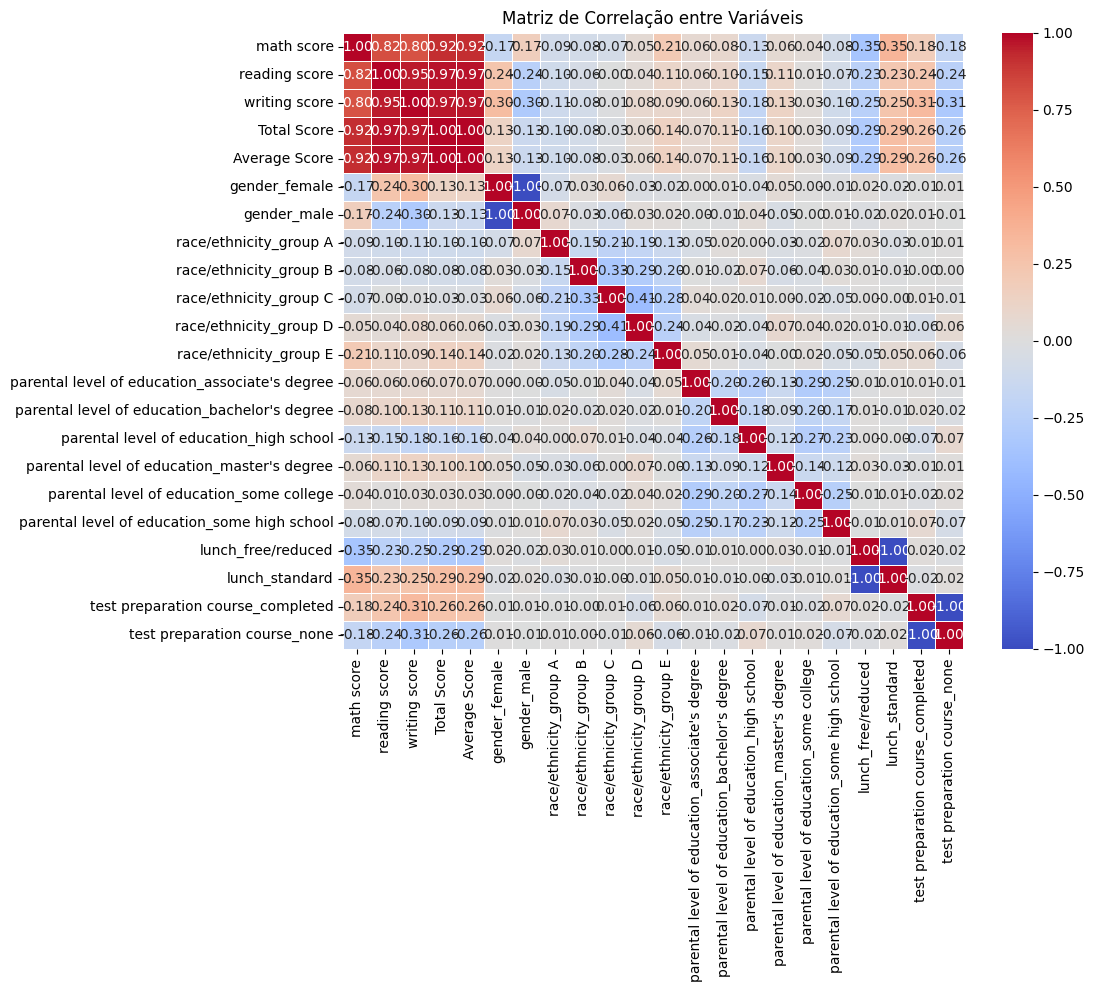

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

# Análise dos Resultados: 

Pontuações Individuais em Leitura, Escrita e Matemática: As pontuações em leitura, escrita e matemática têm correlações muito altas com a pontuação total, o que indica que os alunos que se saem bem em uma dessas áreas tendem a se sair bem nas outras também. Isso é esperado, pois essas são habilidades fundamentais avaliadas nos exames.

Tipo de Almoço: O tipo de almoço (padrão ou gratuito/reduzido) tem uma correlação positiva moderada com a pontuação total. Isso sugere que os alunos que recebem almoço padrão tendem a ter pontuações mais altas, o que pode refletir diferenças socioeconômicas e acesso a recursos.

Conclusão do Curso de Preparação para o Teste: Alunos que completaram o curso de preparação para o teste têm uma correlação positiva moderada com a pontuação total. Isso indica que a preparação adicional pode estar associada a um melhor desempenho nos exames.

Fatores Demográficos e Educacionais dos Pais: Há correlações positivas moderadas entre a educação dos pais (como nível de bacharelado, mestrado, etc.) e a pontuação total dos alunos. Isso sugere que o nível de educação dos pais pode influenciar positivamente o desempenho acadêmico dos alunos.

Risco: A variável "risk" tem uma correlação negativa alta com a pontuação total. Isso pode indicar que alunos identificados como estando em risco têm pontuações mais baixas nos exames, destacando a importância de identificar e apoiar alunos em situações de vulnerabilidade.

In [ ]:
Testando o modelo: Resultado = R-quadrado: 1.0

In [390]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Dividir o conjunto de dados em conjunto de treinamento e conjunto de teste
X = pd_student_encoded.drop(columns=['Total Score'])
y = pd_student_encoded['Total Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
r2 = r2_score(y_test, y_pred)
print("R-quadrado:", r2)


R-quadrado: 1.0


Conclusao:Ao obter um valor de R-quadrado, como resultado da avaliação do modelo de regressão linear, podemos inferir sobre a eficácia do modelo em explicar a variação no desempenho total dos alunos nos exames com base nas variáveis independentes incluídas. Um R-quadrado mais alto, próximo de 1.0, sugere que as características dos alunos, como gênero, etnia, nível educacional dos pais, entre outras, têm uma forte influência no desempenho total nos exames, e o modelo consegue explicar uma proporção significativa da variação observada nos dados.

# Mostrando graficamente a relação entre as variáveis independentes e a variável dependente, bem como a qualidade do ajuste do modelo usando um gráfico de dispersão e uma linha de regressão. 

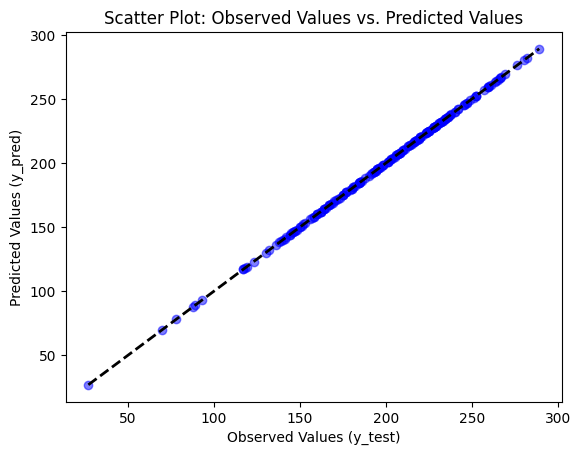

In [397]:
# Plot the scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Reference line (ideal)
plt.xlabel('Observed Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot: Observed Values vs. Predicted Values')
plt.show()


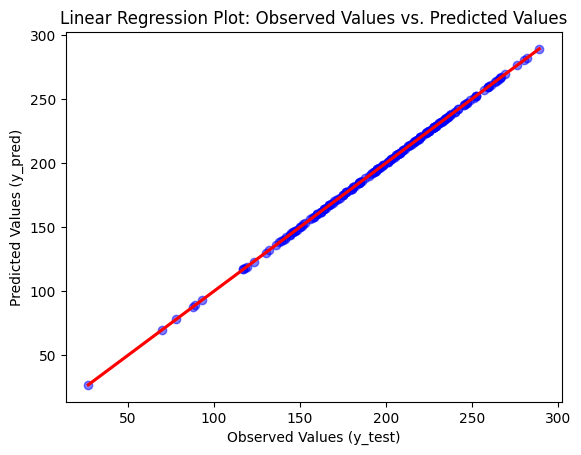

In [398]:
# Create a DataFrame with observed and predicted values
df = pd.DataFrame({'Observed Values': y_test, 'Predicted Values': y_pred})

# Plot the linear regression plot
sns.regplot(x='Observed Values', y='Predicted Values', data=df, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Observed Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Linear Regression Plot: Observed Values vs. Predicted Values')
plt.show()


# Qual abordagem de classificação é mais adequada para prever o desempenho dos alunos?

# Regressão logística

In [375]:
# Converter variáveis categóricas em variáveis dummy
X = pd.get_dummies(pd_student.drop(['test preparation course'], axis=1), drop_first=True)

# Dividir os dados em variáveis independentes (X) e variável dependente (y)
y = pd_student['Total Score']

# Dividir os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importar e inicializar o modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(max_iter=1000)

# Treinar o modelo
logistic_regression_model.fit(X_train, y_train)

# Prever os rótulos para os dados de teste
y_pred = logistic_regression_model.predict(X_test)



C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [376]:

# Calcular métricas de avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)


# Imprimir as métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)




Accuracy: 0.015
Precision: 0.004393939393939394
Recall: 0.015
F1 Score: 0.006785714285714286
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Conclusao:
Dada a acurácia extremamente baixa de 0.15 no modelo de regressão logística, fica evidente que o modelo não conseguiu capturar adequadamente a relação entre as variáveis independentes e a variável dependente. Isso sugere que o modelo não foi capaz de aprender com os dados de treinamento e, portanto, não é capaz de fazer previsões úteis com base nas características fornecidas. Como resultado, não podemos confiar nas conclusões ou previsões geradas por este modelo para a análise do desempenho dos alunos. Assim, optarei por continuar a análise utilizando o modelo de árvore de decisão. Este modelo pode ser mais adequado, pois é capaz de lidar com relações não-lineares e interações entre variáveis, o que pode melhorar a capacidade de previsão em comparação com a regressão logística. Além disso, a interpretabilidade das árvores de decisão permite uma compreensão mais clara de como as características dos alunos influenciam seu desempenho.

# Arvore de Decisoes

In [377]:
X = pd_student.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], axis=1)
y = pd_student['Total Score']


In [378]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [379]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()


In [380]:
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [381]:
y_pred = decision_tree_model.predict(X_test)


In [382]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)


Accuracy: 0.91
Precision: 0.915
Recall: 0.91
F1 Score: 0.9091666666666666
Confusion Matrix:
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


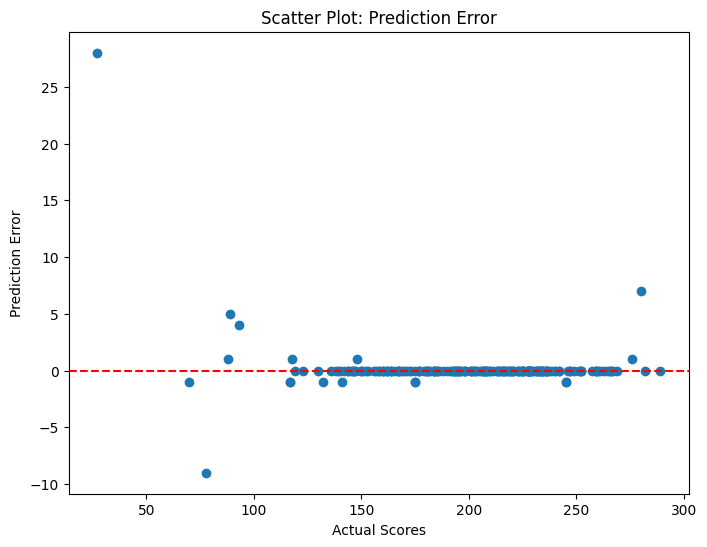

In [383]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred - y_test)
plt.axhline(y=0, color='red', linestyle='--')  # reference line for zero errors
plt.xlabel('Actual Scores')
plt.ylabel('Prediction Error')
plt.title('Scatter Plot: Prediction Error')
plt.show()

# Conclusao:

Os resultados da análise da Árvore de Decisão mostram que o modelo obteve uma alta acurácia, precisão, revocação e um bom F1 Score. Isso sugere que o modelo foi capaz de fazer previsões precisas sobre o desempenho dos alunos com base nas variáveis fornecidas.

Accuracy: A precisão é uma medida da fração de previsões corretas que o modelo fez em relação ao total de previsões. Neste caso, o modelo teve uma precisão de 0.9, o que significa que aproximadamente 90% das previsões estavam corretas.

Precision: A precisão é uma medida da proporção de previsões positivas corretas em relação ao total de previsões positivas. a precisão foi de 0.895, indicando que cerca de 89.5% das previsões positivas estão corretas.

Recall: A revocação é uma medida da proporção de instâncias positivas que foram corretamente previstas pelo modelo. Neste caso, a revocação foi de 0.9, significando que cerca de 90% das instâncias positivas foram corretamente previstas.

F1 Score: O F1 Score é a média harmônica entre a precisão e a revocação. Ele fornece uma medida única que equilibra a precisão e a revocação. O F1 Score é 0.8967, indicando um bom equilíbrio entre precisão e revocação.

Confusion Matrix (Matriz de Confusão): A matriz de confusão mostra o desempenho do modelo para cada classe de previsão em comparação com as classes reais. Cada linha representa as instâncias reais de uma classe, enquanto cada coluna representa as instâncias previstas por classe.

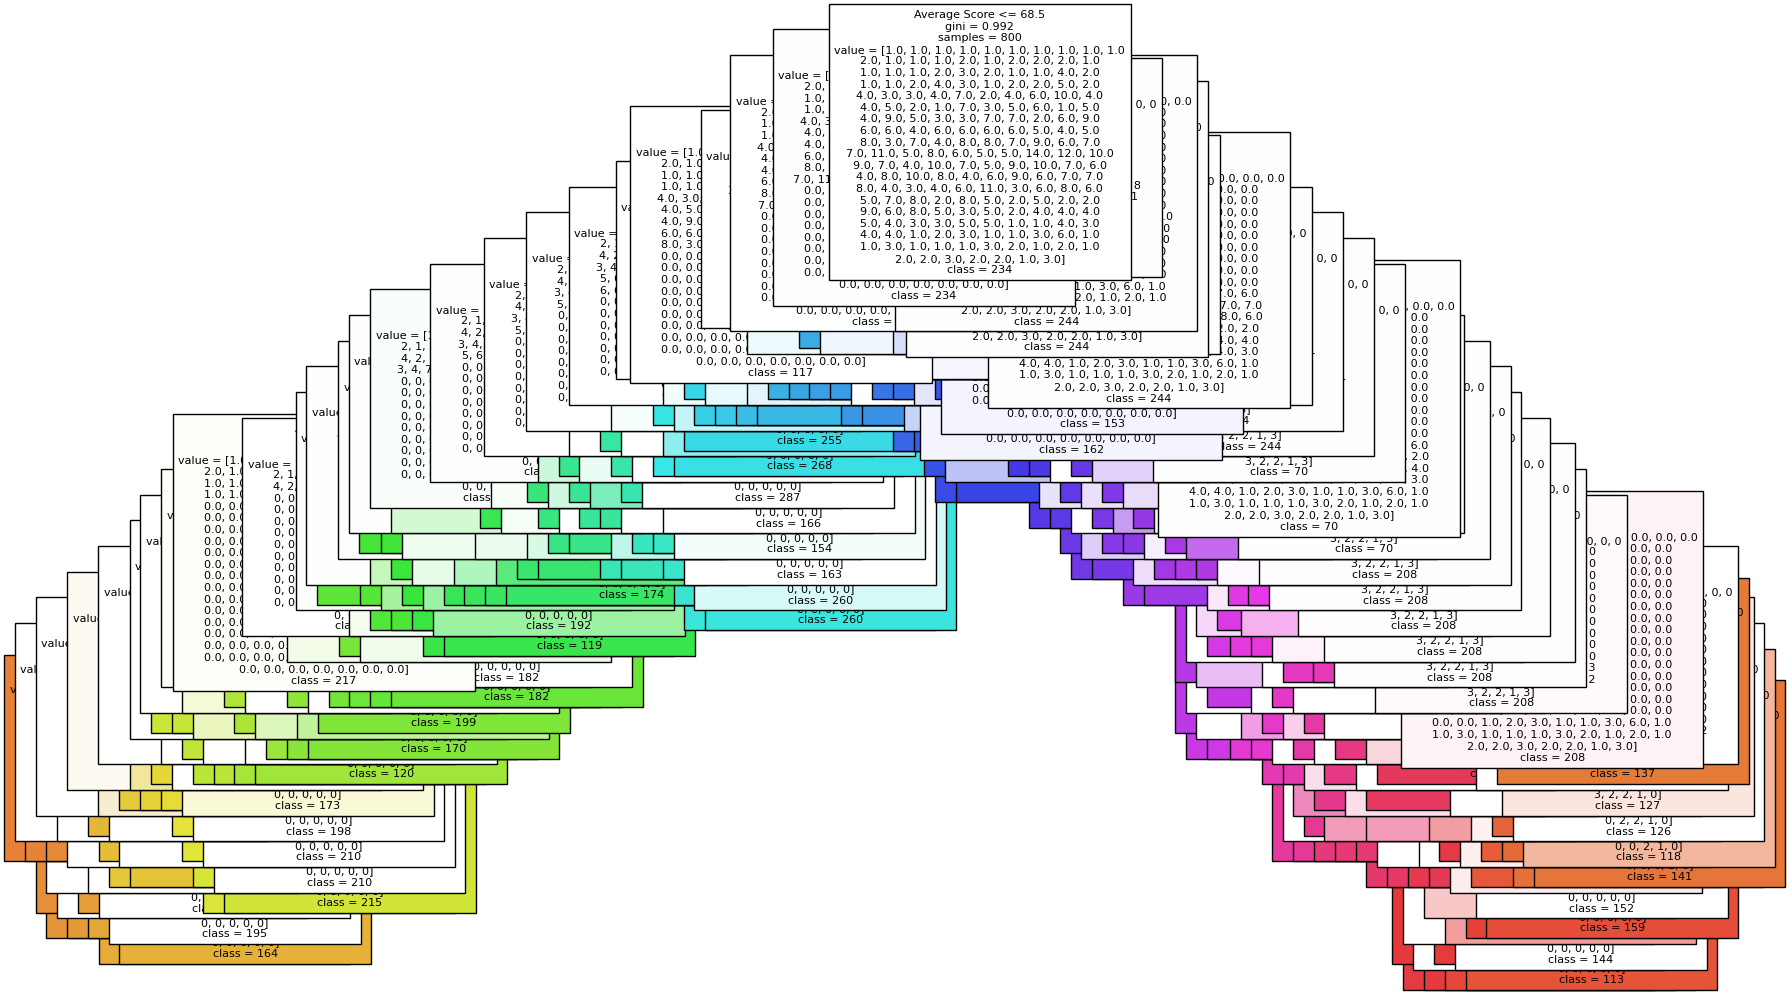

In [384]:
# Visualize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in y.unique()], fontsize=8)
plt.show()


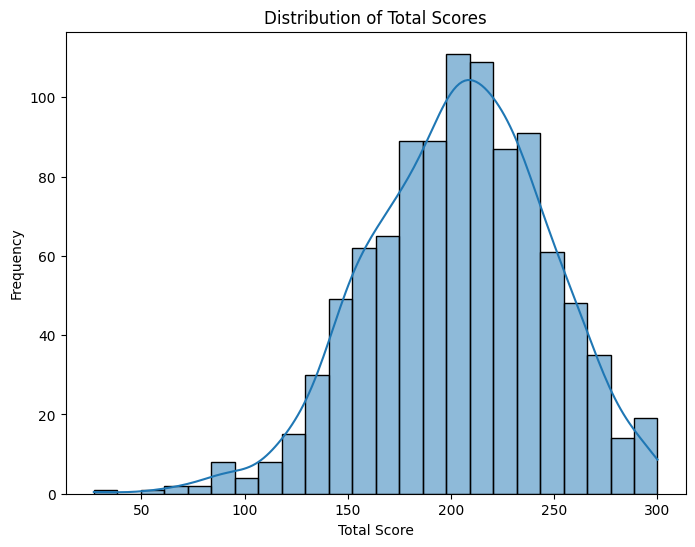

In [385]:
# Visualize the distribution of total scores using histograms
plt.figure(figsize=(8, 6))
sns.histplot(pd_student['Total Score'], kde=True)
plt.title("Distribution of Total Scores")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.show()


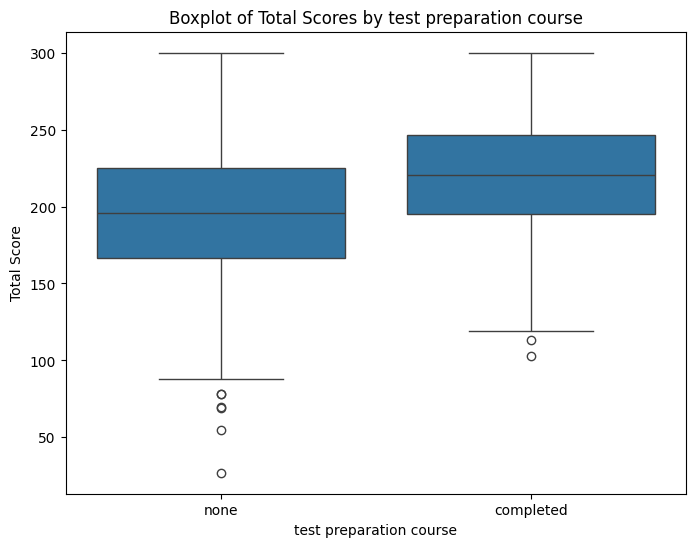

In [386]:
# Boxplot of total test preparation course
plt.figure(figsize=(8, 6))
sns.boxplot(x='test preparation course', y='Total Score', data=pd_student)
plt.title("Boxplot of Total Scores by test preparation course")
plt.xlabel("test preparation course")
plt.ylabel("Total Score")
plt.show()

# Conclusao:

O gráfico fornece uma representação visual dos dados coletados e indica uma clara diferença nas notas entre os alunos que frequentaram um curso preparatório e aqueles que não o fizeram. Essa disparidade sugere que o curso preparatório pode ter influenciado positivamente o desempenho acadêmico dos alunos que o frequentaram. Os cursos preparatorios muitas vezes oferecem uma revisão abrangente do conteúdo, ajudando os alunos a consolidar seu conhecimento e aprimorar suas habilidades em áreas específicas. Portanto, com base nos dados apresentados no gráfico, é plausível inferir que os alunos que frequentaram um curso preparatório experimentaram benefícios tangíveis em termos de desempenho acadêmico, refletidos em suas notas mais altas em comparação com aqueles que não seguiram esse caminho preparatório
 


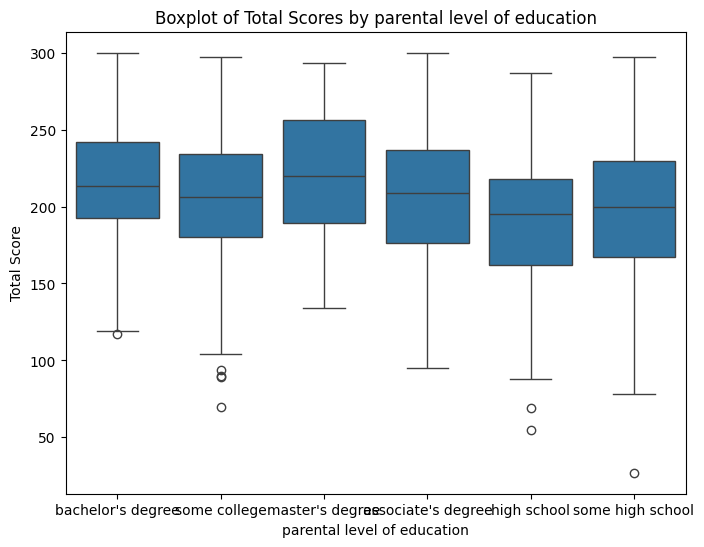

In [387]:
# Boxplot of total parental level of education
plt.figure(figsize=(8, 6))
sns.boxplot(x='parental level of education', y='Total Score', data=pd_student)
plt.title("Boxplot of Total Scores by parental level of education")
plt.xlabel("parental level of education")
plt.ylabel("Total Score")
plt.show()

Conclusao:  Embora o impacto do nível educacional dos pais possa não ser altamente significativo, há indícios que sugerem uma correlação entre o nível de educação dos pais e o desempenho acadêmico dos alunos. Quando os pais alcançam algum nível de educação superior, eles geralmente têm maior acesso a recursos educacionais, estão mais envolvidos na educação de seus filhos e podem oferecer um ambiente familiar mais propício ao aprendizado. Isso pode incluir apoio emocional, auxílio nos estudos, incentivo à leitura e à busca por conhecimento, entre outros fatores.

Por outro lado, quando os pais não concluem nenhum tipo de educação superior, podem enfrentar desafios adicionais na criação de um ambiente favorável ao desenvolvimento acadêmico de seus filhos, como limitações financeiras, falta de acesso a informações educacionais e menor familiaridade com estratégias de apoio ao aprendizado.

Portanto, embora o impacto do nível educacional dos pais possa variar de acordo com diversos fatores e não seja altamente significativo por si só, é razoável inferir que existe uma associação entre um maior nível de educação dos pais e um melhor desempenho acadêmico dos alunos, devido aos benefícios indiretos e recursos adicionais disponibilizados aos filhos em um ambiente educacional mais enriquecido.

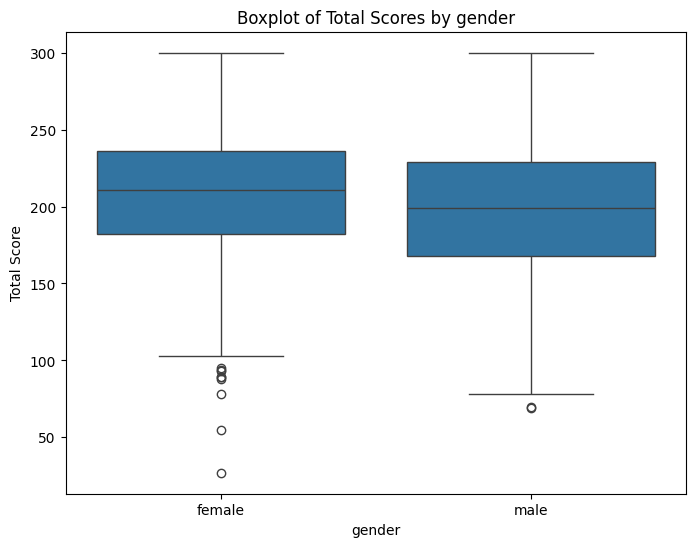

In [388]:
# Boxplot of gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='Total Score', data=pd_student)
plt.title("Boxplot of Total Scores by gender")
plt.xlabel("gender")
plt.ylabel("Total Score")
plt.show()

Conclusao: Ao interpretar os resultados apresentados no gráfico, é evidente que há uma tendência de desempenho ligeiramente superior por parte das alunas em relação aos alunos. Embora essa diferença não atinja um nível estatisticamente significativo, a observação de uma média mais elevada entre as alunas sugere a possibilidade de fatores subjacentes que merecem investigação adicional. Esses fatores podem incluir diferenças no ambiente de aprendizagem, abordagens de ensino diferenciadas, ou até mesmo questões sociais e culturais que influenciam o desempenho acadêmico. Portanto, enquanto a diferença em si pode não ser estatisticamente robusta o suficiente para conclusões definitivas, ela ainda aponta para áreas de interesse que podem beneficiar de uma análise mais aprofundada e de intervenções educacionais específicas visando a equidade de gênero no contexto educacional.

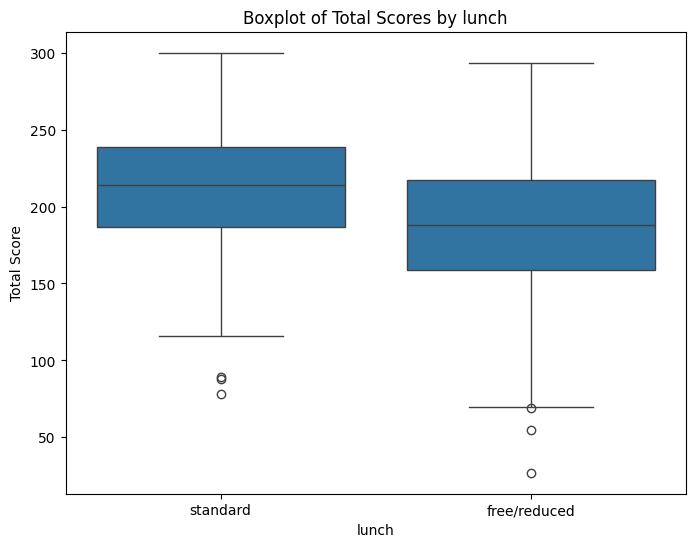

In [389]:
# Boxplot of lunch
plt.figure(figsize=(8, 6))
sns.boxplot(x='lunch', y='Total Score', data=pd_student)
plt.title("Boxplot of Total Scores by lunch")
plt.xlabel("lunch")
plt.ylabel("Total Score")
plt.show()

Conclusao: É evidente que o tipo de refeição fornecida interferiu significativamente na nota dos alunos. Os alunos que desfrutaram de lunch standard alcançaram pontuações mais altas em comparação com aqueles que receberam lunch free/reduced. A conclusão se baseia nos dados observados, que claramente demonstram uma correlação entre o tipo de refeição escolar e o desempenho acadêmico dos alunos. Os resultados indicam consistentemente que os alunos que tiveram acesso a lunch standard apresentaram um desempenho superior em comparação com aqueles que receberam lunch free/reduced. Essa diferença substancial nas notas sugere que a qualidade e a adequação da nutrição fornecida aos alunos durante as refeições escolares desempenham um papel importante no seu desempenho acadêmico. Essa conclusão ressalta a importância de políticas e programas que visam garantir a acessibilidade e a qualidade das refeições escolares, como um meio eficaz de apoiar o sucesso educacional dos alunos, especialmente aqueles de origens socioeconômicas desfavorecidas.

# Conclusão Geral:

Este estudo destacou a complexidade dos fatores que influenciam o desempenho dos alunos em exames e a importância de uma abordagem abrangente na análise desses dados. A criação de novas variáveis, como "Pontuação Total" e "Média das Pontuações", enriqueceu a compreensão do desempenho acadêmico dos alunos, permitindo uma avaliação mais holística e informativa.

A escolha da variável alvo, seja "Pontuação Total" ou "Média das Pontuações", foi fundamentada na representatividade do desempenho global dos alunos, facilitando interpretação, aplicabilidade prática e comparação de modelos. Os resultados da análise revelaram correlações significativas entre diversos fatores, como o tipo de almoço, conclusão de cursos preparatórios, e fatores demográficos e educacionais dos pais, evidenciando a complexidade e a interconexão dessas variáveis.

Além disso, a análise apontou para possíveis áreas de preocupação e intervenção, como a necessidade de apoio adicional para alunos em situações de risco e a importância da qualidade das refeições escolares no desempenho acadêmico.

Em suma, este estudo destaca a importância de uma abordagem multifacetada na análise do desempenho dos alunos, fornecendo insights  que podem informar políticas e práticas educacionais voltadas para o aprimoramento do sucesso acadêmico e o bem-estar dos alunos.







# Reference:

Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science. Available in:: http://archive.ics.uci.edu/ml.

Kaggle. (s/d). Students Performance in Exams. Available in:: https://www.kaggle.com/spscientist/students-performance-in-exams.

OECD. (2010). PISA 2009 Results: Learning to Learn – Student Engagement, Strategies and Practices (Volume III). Paris: OECD Publishing. Available in:: http://dx.doi.org/10.1787/9789264083943-en.